# Exploratory Data Analysis (EDA) and Multicollinearity Check

## 1. Dataset Overview:
The dataset contains 1,436 entries and 11 columns. The features are as follows:

- **Price** (int): Target variable (price of the car).
- **Age_08_04** (int): Age of the car (in months).
- **KM** (int): Kilometers driven.
- **Fuel_Type** (object): Type of fuel (Diesel, Petrol, CNG).
- **HP** (int): Horsepower.
- **Automatic** (int): Indicator for automatic transmission (1: Yes, 0: No).
- **cc** (int): Engine displacement in cubic centimeters.
- **Doors** (int): Number of doors.
- **Cylinders** (int): Number of cylinders.
- **Gears** (int): Number of gears.
- **Weight** (int): Weight of the car (in kg).

There are no missing values in the dataset.

## 2. Descriptive Statistics:
- **Price**: Ranges from 4,350 to 32,500, with a mean of 10,730.
- **Age_08_04**: Ranges from 1 to 80 months, with a mean of 56 months.
- **KM**: Varies significantly (max 243,000 km, mean 68,533 km).
- **HP**: Ranges from 69 to 192, with an average of 101 HP.
- **Automatic**: Most cars are manual (mean value for "Automatic" is low).
- **cc**: A wide range, indicating some outliers.
- **Doors, Cylinders, Gears**: Little variation, especially for Cylinders (all are 4).
  
## 3. Correlation Matrix:

![Correlation Matrix](correlation_matrix_image.png)





## 5. Conclusion:
The feature **Cylinders** shows extreme multicollinearity and might need to be removed. Other features appear to be adequately independent.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# 2. Load and Inspect the Data

## 2. Descriptive Statistics:
- **Price**: Ranges from 4,350 to 32,500, with a mean of 10,730.
- **Age_08_04**: Ranges from 1 to 80 months, with a mean of 56 months.
- **KM**: Varies significantly (max 243,000 km, mean 68,533 km).
- **HP**: Ranges from 69 to 192, with an average of 101 HP.
- **Automatic**: Most cars are manual (mean value for "Automatic" is low).
- **cc**: A wide range, indicating some outliers.
- **Doors, Cylinders, Gears**: Little variation, especially for Cylinders (all are 4).

In [4]:
# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')

# Display basic info and first few rows
df.info()
print(df.describe())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## 3. Exploratory Data Analysis (EDA)

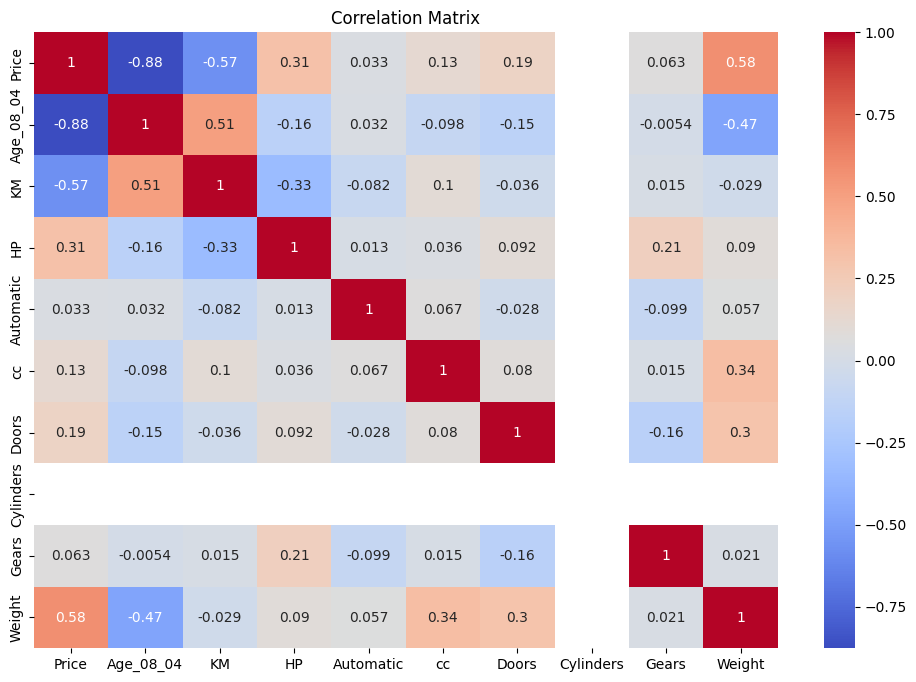

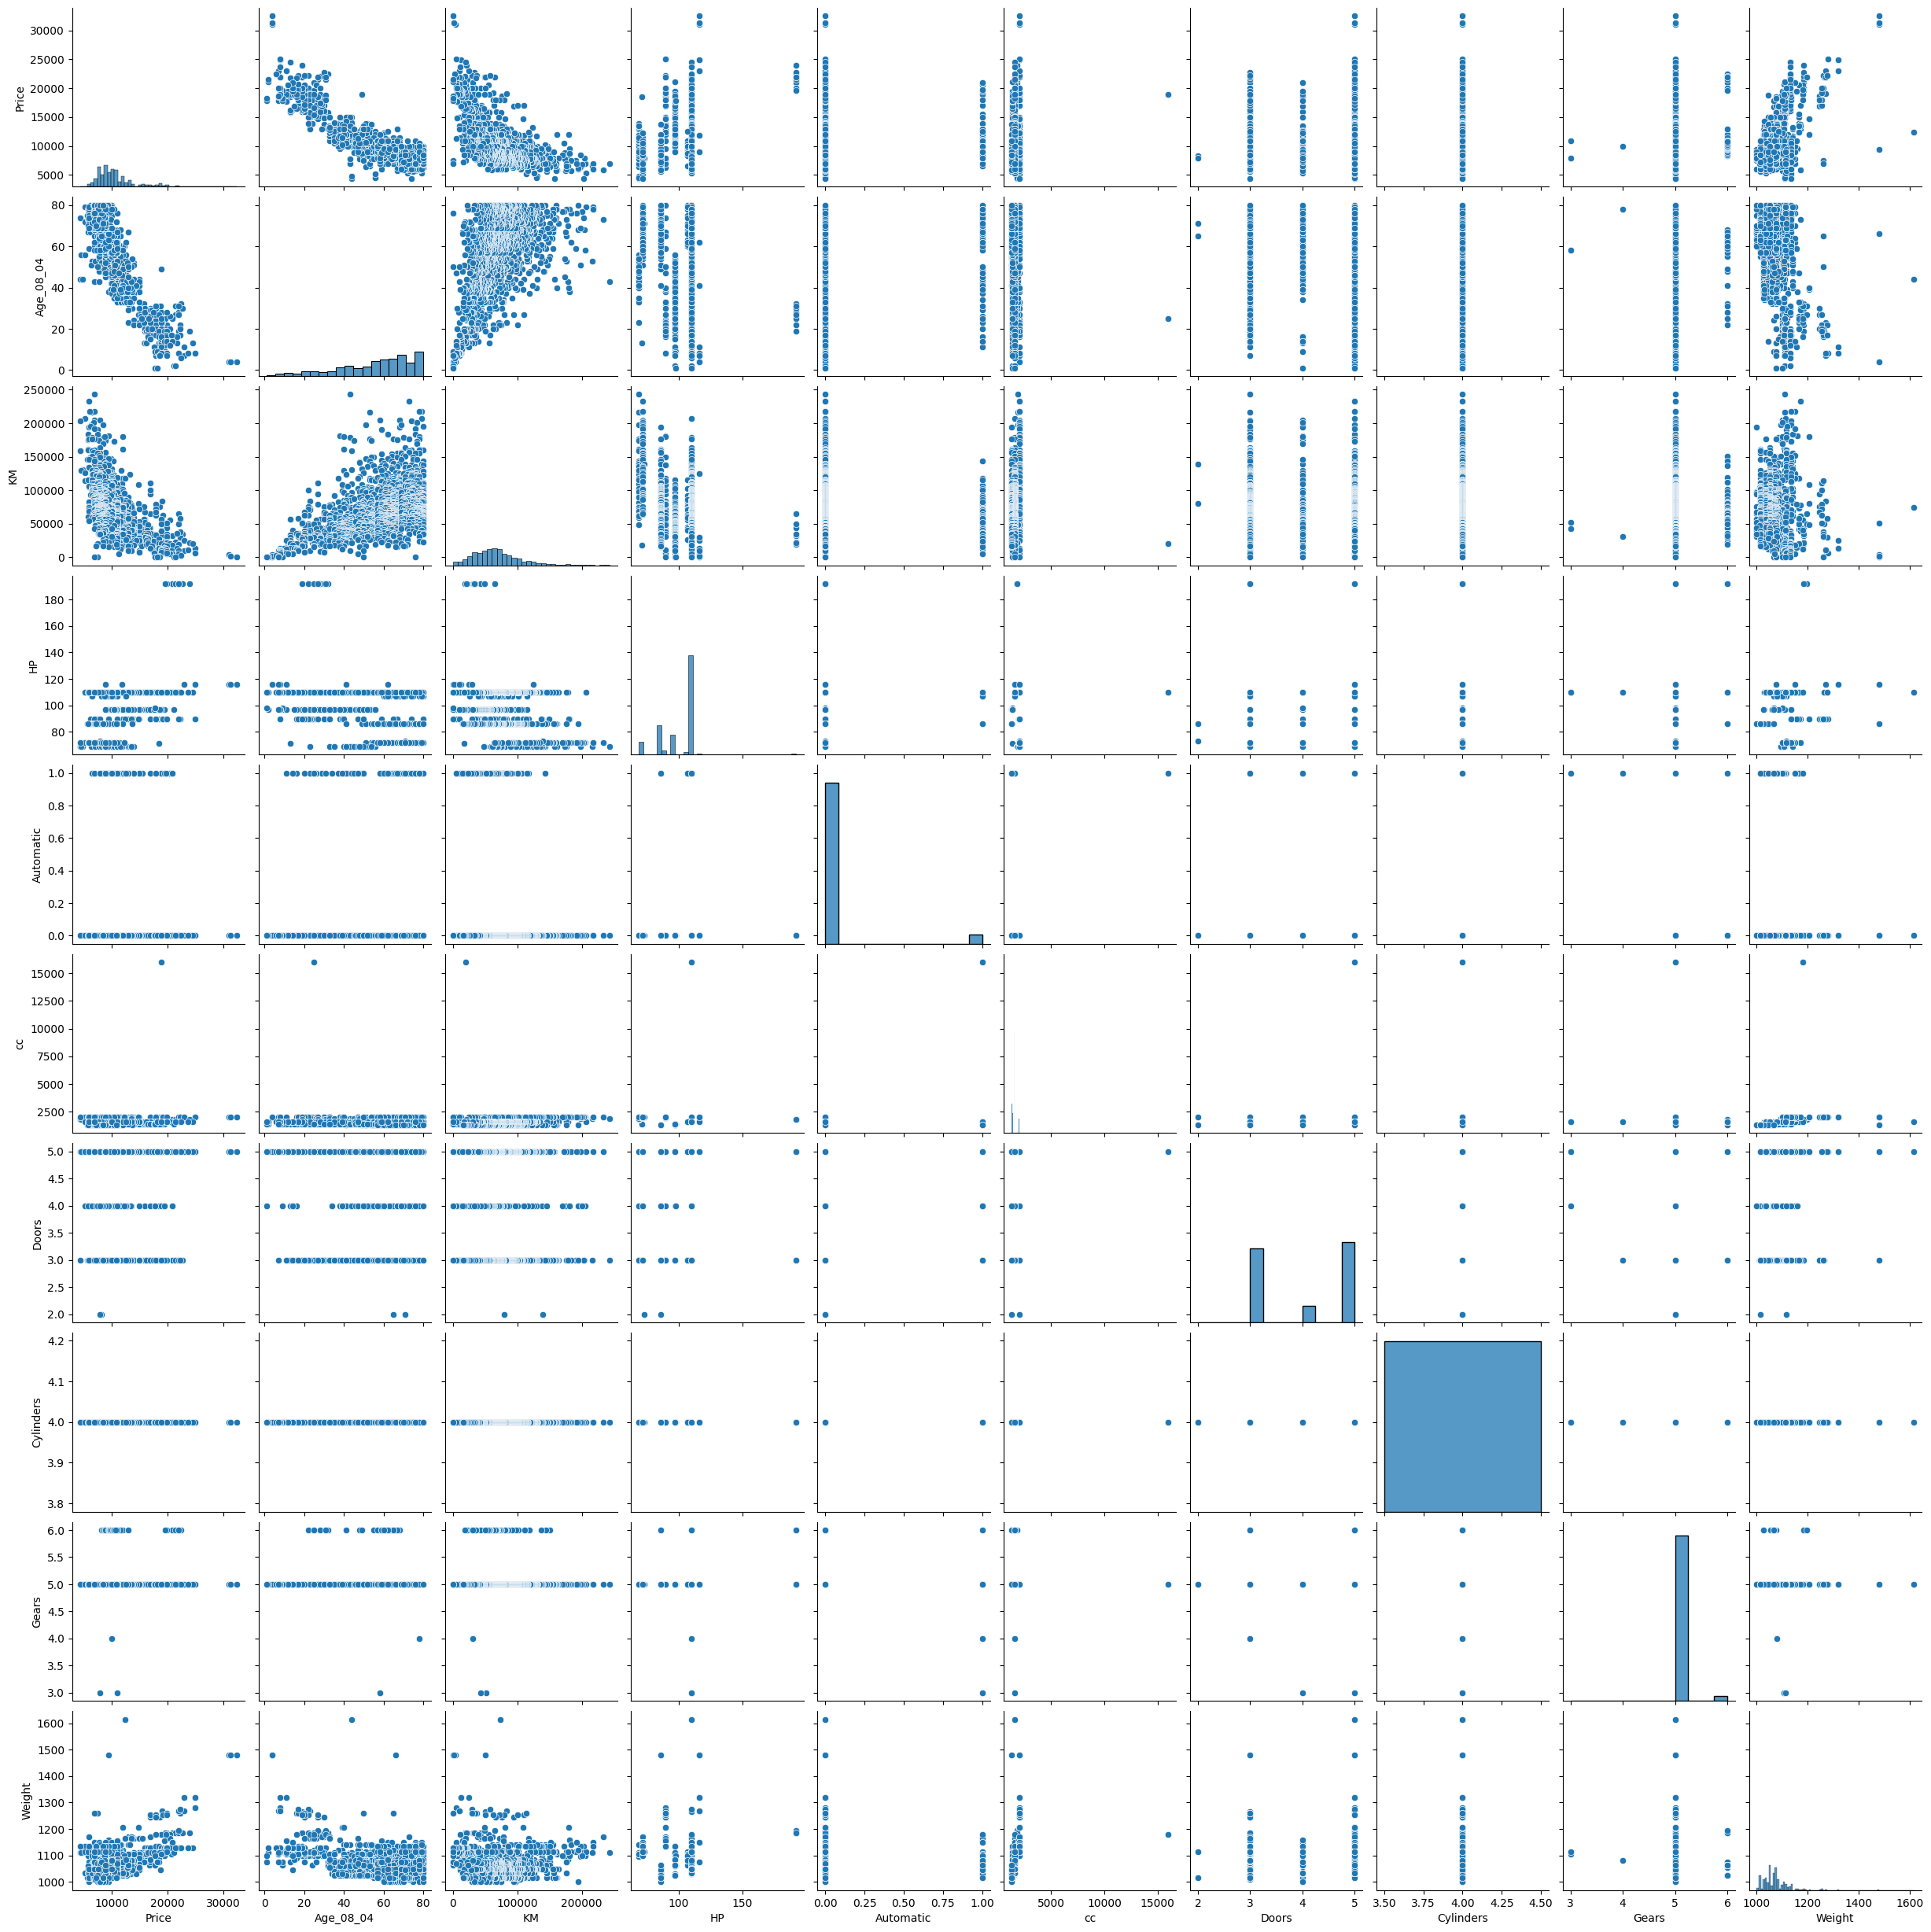

In [5]:
# Correlation matrix to check multicollinearity
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns="Fuel_Type").corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot to explore relationships
sns.pairplot(df)
plt.show()



## 4. Data Preprocessing
- One-Hot Encoding for Categorical Variables

In [6]:
# Perform One-Hot Encoding for the 'Fuel_Type' column
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'])

# Drop multicollinear feature 'Cylinders'
df_encoded = df_encoded.drop('Cylinders', axis=1)

# Check updated data
df_encoded.head()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,False,True,False
1,13750,23,72937,90,0,2000,3,5,1165,False,True,False
2,13950,24,41711,90,0,2000,3,5,1165,False,True,False
3,14950,26,48000,90,0,2000,3,5,1165,False,True,False
4,13750,30,38500,90,0,2000,3,5,1170,False,True,False


###  5. Encode the data


In [8]:
# Define features (X) and target (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split into train and test sets (80% train, 20% test)


df_encoded['Fuel_Type_CNG'] = df_encoded['Fuel_Type_CNG'].astype('int64')
df_encoded['Fuel_Type_Petrol'] = df_encoded['Fuel_Type_Petrol'].astype('int64')
df_encoded['Fuel_Type_Diesel'] = df_encoded['Fuel_Type_Diesel'].astype('int64')



6. Build the Multiple Linear Regression Model
- Using statsmodels for Detailed Output

In [57]:
df_encoded.columns


Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [9]:
# # # Add constant to the model (intercept term)
# # Fit the MLR model using statsmodels
import statsmodels.formula.api as smf
mlr_model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data = df_encoded).fit()

# # Summary of the model
print(mlr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:45:44   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6971.2342   1143.563  

7. Model Evaluation
- Performance on Test Data

In [59]:
# # Add constant to the test set
# X_test_sm = sm.add_constant(X_test)

# Predict on the test set
# y_pred = mlr_model.predict(X_test)

# # Calculate RMSE and R-squared for the test set
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE on Test Set: {rmse}")
# print(f"R-squared on Test Set: {r2}")


Checking for Assumptions
- Multicollinearity (using VIF)

In [10]:
mlr_model.fittedvalues


0       16304.152422
1       15849.403232
2       16272.811172
3       15915.052508
4       15690.503276
            ...     
1431     8694.200430
1432     8141.751414
1433     8300.294866
1434     8425.824273
1435    10527.736468
Length: 1436, dtype: float64

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
data = df_encoded.drop(columns=['Price'])
vif_data = pd.DataFrame()
vif_data['Features'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data,i) for i in range(len(data.columns))]


print(vif_data)


            Features          VIF
0          Age_08_04     1.920520
1                 KM     2.001790
2                 HP     2.299766
3          Automatic     1.094550
4                 cc     1.223892
5              Doors     1.217898
6              Gears     1.117413
7             Weight     3.297145
8      Fuel_Type_CNG    22.221198
9   Fuel_Type_Diesel   221.585039
10  Fuel_Type_Petrol  1541.551915


no null value

- Residuals Normality Check

In [62]:

# Residual plot
mlr_model.rsquared


0.8649083778053923

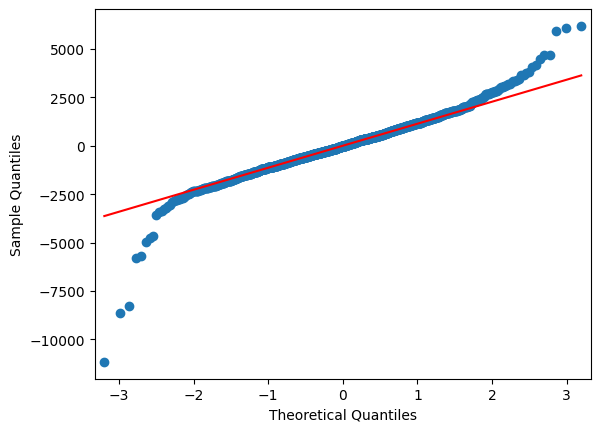

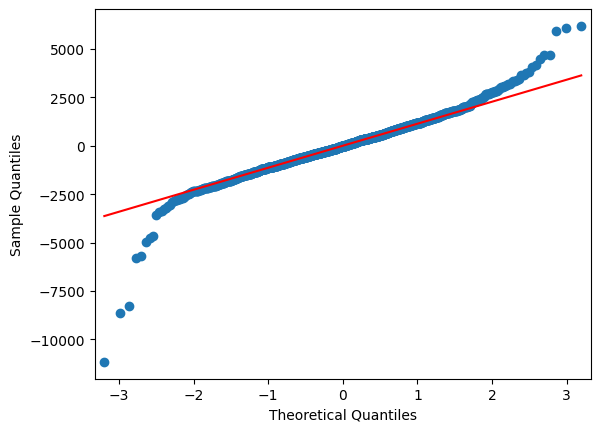

In [63]:
sm.qqplot(mlr_model.resid, line='q')


In [64]:
np.argmax(mlr_model.resid), np.max(mlr_model.resid)


(147, 6191.469675938522)

- Homoscedasticity Check

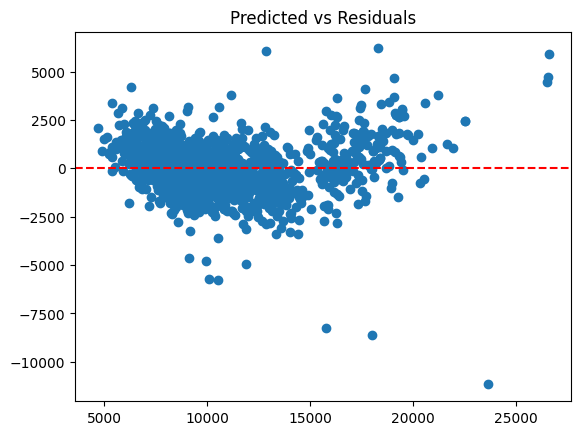

In [65]:
# Scatter plot of predicted vs residuals
plt.scatter(mlr_model.fittedvalues, mlr_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Predicted vs Residuals")
plt.show()


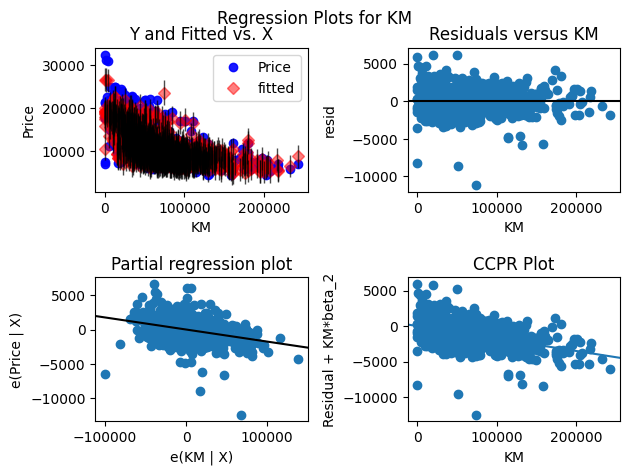

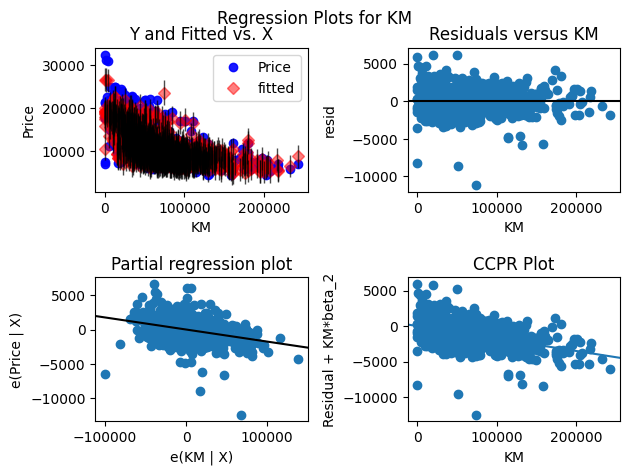

In [66]:
sm.graphics.plot_regress_exog(mlr_model,'KM')


In [67]:
inf = mlr_model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance


Text(0, 0.5, 'Cooks Distance')

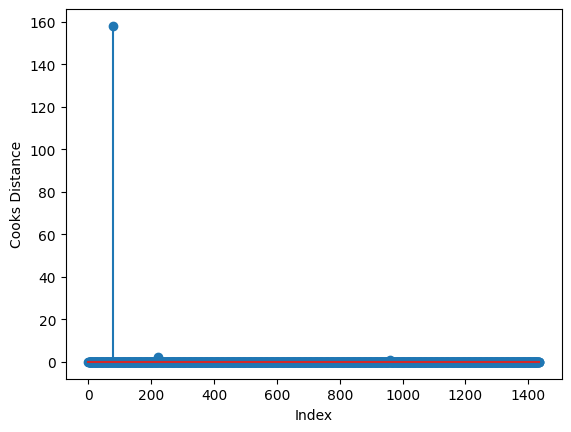

In [68]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')


In [69]:
np.argmax(c), np.max(c)


(80, 158.053187042315)

In [70]:
df_encoded['Cooks Distance'] = c


In [71]:
df_encoded[df_encoded['Cooks Distance'] > 1]


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Cooks Distance
80,18950,25,20019,110,1,16000,5,5,1180,0,0,1,158.053187
221,12450,44,74172,110,0,1600,5,5,1615,0,0,1,2.300663


In [72]:
df_encoded.drop(index=[80,221],inplace=True)


In [73]:
df.reset_index(inplace=True)


In [74]:
final_mlr_model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data = df_encoded).fit()


In [39]:
final_mlr_model.rsquared


0.8771493794139966

In [42]:
# Define new data as a dictionary
test = {
    'Age_08_04': [60, 30, 45, 72],
    'KM': [150000, 80000, 130000, 170000],
    'Fuel_Type': ['Diesel', 'Petrol', 'CNG', 'Diesel'],
    'HP': [110, 90, 100, 95],
    'Automatic': [0, 1, 0, 0],
    'cc': [2000, 1600, 1800, 1900],
    'Doors': [4, 4, 5, 3],
    'Gears': [5, 5, 6, 5],
    'Weight': [1200, 1100, 1250, 1300]
}

# Convert new data to a DataFrame
test = pd.DataFrame(test)
test


,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,60,150000,Diesel,110,0,2000,4,5,1200
1,30,80000,Petrol,90,1,1600,4,5,1100
2,45,130000,CNG,100,0,1800,5,6,1250
3,72,170000,Diesel,95,0,1900,3,5,1300


In [49]:
test = pd.get_dummies(test, columns=['Fuel_Type'])
test['Fuel_Type_CNG'] = test['Fuel_Type_CNG'].astype('int64')
test['Fuel_Type_Petrol'] = test['Fuel_Type_Petrol'].astype('int64')
test['Fuel_Type_Diesel'] = test['Fuel_Type_Diesel'].astype('int64')


In [50]:
final_mlr_model.params


Intercept          -7963.170215
Age_08_04           -118.367332
KM                    -0.015683
HP                    46.184753
Automatic            162.521817
cc                    -3.679257
Doors                -52.823498
Gears                448.182896
Weight                26.025926
Fuel_Type_CNG      -3869.262717
Fuel_Type_Diesel   -1509.767699
Fuel_Type_Petrol   -2584.139799
dtype: float64

In [51]:
final_mlr_model.predict(test)


0    12055.140560
1    13737.522437
2    13755.471427
3    12651.646822
dtype: float64

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


In [20]:
from sklearn.linear_model import Lasso
X =df_encoded.drop(columns="Price")
y = df_encoded["Price"]
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)


Lasso(alpha=0.1)

In [27]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print("Lasso MSE: ", lasso_mse)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Ridge MSE: ", ridge_mse)


Lasso MSE:  2202923.027002638
Ridge MSE:  2202555.890746766


### 1.What is Normalization & Standardization and how is it helpful?
- Normalization is a scaling technique in which values are scaled to a common range, usually between 0 and 1, having a mean of 0 and standard deviation of 1. 
- Standardization is another scaling technique in which values are scaled to have a mean of 0 and standard deviation of 1.

### 2.What techniques can be used to address multicollinearity in multiple linear regression?
There are several techniques that can be used to address multicollinearity in multiple linear regression, including:

1. **Variable selection**: Remove one or more of the highly correlated variables from the model.
2. **Dimensionality reduction**: Use techniques such as principal component regression (PCR) or partial least squares regression (PLS) to reduce the number of variables in the model.
3. **Regularization**: Use techniques such as ridge regression or LASSO regression to reduce the impact of multicollinearity on the model.
4. **Centering and scaling**: Center and scale the variables to reduce the correlation between them.
5. **Collect more data**: Collecting more data can help to reduce the impact of multicollinearity on the model.